#  <span style="color:red">**Movie Recomdetation System**</span>

## Dataset: [The Indian Movie Database](https://www.kaggle.com/pncnmnp/the-indian-movie-database?select=collaborative)

## <span style="color:blue">*Importing library*</span>

##### numpy : A library used to manipulate multi-dimensional data in the form of numpy arrays with useful in-built functions.
##### pandas : An open source library used for data manipulation, cleaning, analysis and visualization.
##### matplotlib : A library used for plotting and visualization of data.
##### seaborn : A library based on matplotlib which is used for plotting of data.
##### tikinter:A library used to making interface

In [2]:
# importing all librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk



### Read the data from the The indian movie dataset using the read_csv() function from the pandas library.

In [3]:
df=pd.read_csv("collaborative/ratings.csv",encoding='utf-8')
mv=pd.read_csv("collaborative/titles.csv",encoding='utf-8')

### Showing shapes of  both file

In [4]:
print(df.shape)
print(mv.shape)

(17604, 4)
(788, 2)


### Showing top 5 rows of both data frame

In [5]:
print(df.head())
print(mv.head())

   user_id  movie_id  rating   timestamp
0      172     94969     5.0  1396067836
1      172     98956     4.0  1396067879
2      176     73881     4.0  1499807147
3      221      1900     4.5  1288550866
4      333     33688     4.0  1412015122
   movie_id                                              title
0       139                                      Target (1995)
1       568                          Bhaji on the Beach (1993)
2      1900  Children of Heaven  The (Bacheha-Ye Aseman) (1...
3      2284                                Bandit Queen (1994)
4      5985                    Asoka (Ashoka the Great) (2001)


### Elemenating Unwanted coloumn

In [6]:
df=df[["user_id","movie_id","rating"]]

In [7]:
df.head()

,user_id,movie_id,rating
0,172,94969,5.0
1,172,98956,4.0
2,176,73881,4.0
3,221,1900,4.5
4,333,33688,4.0


### Checking unique user and movie name

In [8]:
print(df["user_id"].nunique())
print(df["movie_id"].nunique())

5667
779


## Merging Two data frame df and mv using pandas merge  funcation on movieId

In [9]:
df=pd.merge(df,mv,on="movie_id")
df.shape

(17604, 4)

In [10]:
df.dtypes

user_id       int64
movie_id      int64
rating      float64
title        object
dtype: object

###  Checking merge data frame

In [11]:
df.head()

,user_id,movie_id,rating,title
0,172,94969,5.0,Kahaani (2012)
1,2419,94969,3.0,Kahaani (2012)
2,9168,94969,1.0,Kahaani (2012)
3,9303,94969,3.0,Kahaani (2012)
4,9535,94969,4.0,Kahaani (2012)


In [12]:
df.tail()

,user_id,movie_id,rating,title
17599,263047,176249,3.5,Mom (2017)
17600,272748,176249,3.5,Mom (2017)
17601,271060,192515,4.5,Ramaiya Vastavaiya (2013)
17602,271113,186637,2.0,Bobby Jasoos (2014)
17603,280887,164443,1.0,Freaky Ali (2016)


### merging data frame  susscesful

## Getting avg rating's of the movies in separate coloumn called rating

In [13]:
av_rating=df.groupby('title').mean()['rating'].sort_values(ascending=False)
ratings=pd.DataFrame(av_rating)

###### showing top 5 rows of avg_rating

In [14]:
ratings.head()

,rating
title,
Shor in the City (2011),5.00
Hooligan (1998),5.00
Humpty Sharma Ki Dulhania (2014),5.00
Samay: When Time Strikes (2003),5.00
Hichki (2018),4.75


## Getting numbers of people rated the movies in separate coloumn called num of ratings

In [15]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [16]:
ratings.head()

,rating,num of ratings
title,,
Shor in the City (2011),5.00,1
Hooligan (1998),5.00,2
Humpty Sharma Ki Dulhania (2014),5.00,1
Samay: When Time Strikes (2003),5.00,1
Hichki (2018),4.75,2


###### histogram of avg_ratings vs num of people rated

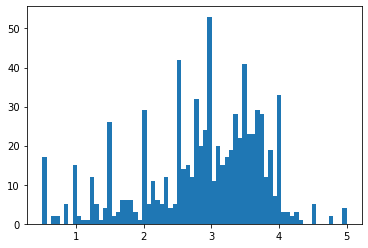

In [17]:
plt.hist(ratings['rating'],bins=70)
plt.show()

###### seaborn used for better visualization

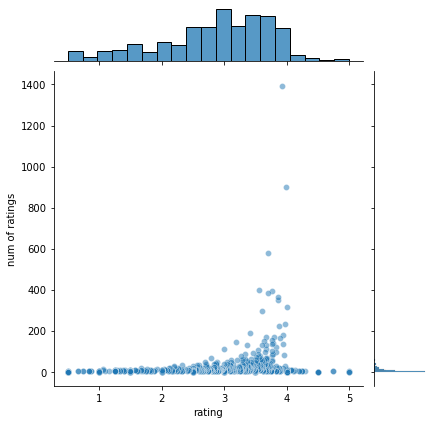

In [18]:
sns.jointplot(x='rating' ,y='num of ratings' , data= ratings, alpha=0.5)

### Making Matrix of user vs movie title  in which ratigs connect them

In [19]:
moviemat=df.pivot_table(index="user_id",columns="title", values ="rating",dropna=True)

In [20]:
moviemat.head()

title,100 Days (1991),1920 (2008),1920: Evil Returns (2012),1942: A Love Story (1994),2 States (2014),3 A.M (2014),3 Idiots (2009),36 China Town (2006),404: Error Not Found (2011),7 Khoon Maaf (2011),...,Youngistaan (2014),Yuva (2004),Zakhm (1998),Zameen (2003),Zanjeer (1973),Zeher (2005),Zid (2014),Zindagi Na Milegi Dobara (2011),Zokkomon (2011),road (2002)
user_id,,,,,,,,,,,,,,,,,,,,,
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking or building one example

##### Firist I am serching a movie name in the moviemat matrix then storing its all review in the khaani. 

In [21]:
khaani=moviemat["Kahaani (2012)"]
khaani.head()

user_id
172    5.0
176    NaN
221    NaN
333    NaN
339    NaN
Name: Kahaani (2012), dtype: float64

##### Now  I am serching all the movie which are correlated with khaani on the basis of rating.

In [22]:
similar_to_khaani=moviemat.corrwith(khaani)
print(similar_to_khaani)

C:\Users\ravis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ravis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
100 Days (1991)                         NaN
1920 (2008)                        0.654654
1920: Evil Returns (2012)          1.000000
1942: A Love Story (1994)          0.353553
2 States (2014)                   -0.442841
                                     ...   
Zeher (2005)                       1.000000
Zid (2014)                              NaN
Zindagi Na Milegi Dobara (2011)    0.060752
Zokkomon (2011)                         NaN
road (2002)                             NaN
Length: 779, dtype: float64


##### Now i am changing the correlation table to a data frame

In [23]:
cor_khanni=pd.DataFrame(similar_to_khaani,columns=['correlation'])
cor_khanni.head()

,correlation
title,
100 Days (1991),NaN
1920 (2008),0.654654
1920: Evil Returns (2012),1.000000
1942: A Love Story (1994),0.353553
2 States (2014),-0.442841


##### Now i am droping the NaN values from  data frame

In [24]:
cor_khanni.dropna(inplace=True)
cor_khanni.head()

,correlation
title,
1920 (2008),0.654654
1920: Evil Returns (2012),1.000000
1942: A Love Story (1994),0.353553
2 States (2014),-0.442841
3 Idiots (2009),0.389798


##### shorting the row in descending order

In [25]:
cor_khanni.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Kahaani (2012),1.0
Love Sex aur Dhokha (2010),1.0
Page 3 (2005),1.0
Bardaasht (2004),1.0
Chess Players The (Shatranj Ke Khilari) (1977),1.0
Brahman Naman (2016),1.0
Raja Natwarlal (2014),1.0
Deceivers The (1988),1.0
Rock On 2 (2016),1.0


##### I am addding num of rating in the correlation.

In [26]:
cor_khanni=cor_khanni.join(ratings['num of ratings'])
cor_khanni.head()

,correlation,num of ratings
title,,
1920 (2008),0.654654,10
1920: Evil Returns (2012),1.000000,5
1942: A Love Story (1994),0.353553,5
2 States (2014),-0.442841,16
3 Idiots (2009),0.389798,1394


###### Here we are getting all the correlation with khani which have rated more than  30  people

In [27]:
cor_khanni[cor_khanni['num of ratings']>50].sort_values('correlation',ascending=False)

,correlation,num of ratings
title,,
Kahaani (2012),1.000000,224
Holiday (2014),0.934005,37
Munna bhai M.B.B.S. (2003),0.920329,37
Fly Away Solo (2015),0.904144,35
Don 2 (2011),0.868618,55
...,...,...
Dil Dhadakne Do (2015),-0.389351,31
Salaam Namaste (2005),-0.396059,38
Dear Zindagi (2016),-0.587945,35


### **Here I am making funcation which can do the all operation in the**

In [77]:
def predict_movies(movie_name):
    movie_user_rating=moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_rating)
    
    corr_movie=pd.DataFrame(similar_to_movie,columns=["Correlation"])
    corr_movie.dropna(axis='columns',thresh=2)
    
    corr_movie=corr_movie.join(ratings['num of ratings'])
    prediction=pd.DataFrame(corr_movie[corr_movie['num of ratings']>50].sort_values('Correlation',ascending=False))
        
    
    return prediction.head(11)

#### Checking a example

In [78]:
prediction=predict_movies("Wanted (2009)")

C:\Users\ravis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ravis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [79]:
prediction.head()

,Correlation,num of ratings
title,,
Wanted (2009),1.000000,187
Band Baaja Baaraat (2010),0.761881,74
My Name is Khan (2010),0.730017,295
Chennai Express (2013),0.726333,66
OMG Oh My God! (2012),0.725176,81


##  <span style="color:red">**Making a Gui Application**</span>

In [121]:
root=tk.Tk()
name_of_movie=tk.StringVar()

### Here we are creating a window when user press submit button

In [122]:
def submit():
    name=name_of_movie.get()
    root1=tk.Tk()
    root1.title("MOVIE RECOMDATE")
    big_frame=tk.Frame(root1)
    big_frame.pack(fill='both', expand=True)
    
    lis=tk.Message(big_frame,text=predict_movies(name),font=("Comic Sans MS",10,"bold"),bg="orange",fg="red")
    
    lis.pack(side="top",fill='both', expand=True)
    print(pd.DataFrame(predict_movies(name)))
    root1.geometry('500x500')
    
    root1.mainloop()
    name_of_movie.set("")

### Here we are designing the primary window

In [123]:
name_label=tk.Label(root,text="Enter Movie Name",font=("Comic Sans MS",12,"bold"),bg="blue2")
name_entry=tk.Entry(root,textvariable=name_of_movie,font=("calibre",10,"bold"))
sub_btn=tk.Button(root,text = 'Submit', command = submit,bg="red",fg="yellow")


In [124]:
name_label.grid(row=0,column=1)
name_entry.grid(row=0,column=2)
sub_btn.grid(row=3,column=2)

### Result will be displaying on console as well as on window.

In [125]:
root.title("MOVIE RECOMDATION ")
root.configure(bg="green2")
root.geometry('300x150')
root.mainloop()

C:\Users\ravis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ravis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\ravis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ravis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


                                Correlation  num of ratings
title                                                      
3 Idiots (2009)                         1.0            1394
Yeh Jawaani Hai Deewani (2013)          1.0              67
Barfi! (2012)                           1.0             131
Bhaag Milka Bhaag (2013)                1.0              94
Queen (2014)                            1.0              82
PK (2014)                               1.0             392
English Vinglish (2012)                 1.0              61
Lage Raho Munna Bhai (2006)             1.0              95
Kahaani (2012)                          1.0             224
Special 26 (2013)                       1.0              59
Piku (2015)                             1.0              90
